In [68]:
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [69]:
df = pd.read_csv("passengers.csv")
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


# 1. Описание годовой сезонности

In [70]:
# переведем столбец Month в формат datetime
df['Month'] = pd.to_datetime(df['Month'])
# переведём столбец Month в индексы
# data1 = df.set_index('Month')
# data1


In [71]:

df['year'] = df["Month"].dt.year
df["Month"] = df["Month"].dt.month


In [72]:
df

,Month,#Passengers,year
0,1,112,1949
1,2,118,1949
2,3,132,1949
3,4,129,1949
4,5,121,1949
...,...,...,...
139,8,606,1960
140,9,508,1960
141,10,461,1960
142,11,390,1960


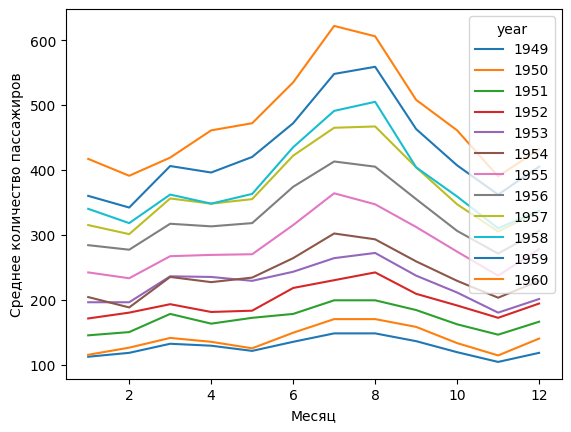

In [73]:

df1 = df.pivot_table(index=df["Month"], columns='year', values='#Passengers', aggfunc='mean')

df1.plot()
plt.xlabel('Месяц')
plt.ylabel('Среднее количество пассажиров')
plt.show()


По графику можем понять, что пик пассажиров приходит на июль и август. Также можем заметить, что с каждым годом пассажиры увеличиваются, что говорит об улучшении гражданской авиации.

# 2. Исследование данных по отдельным месяцам

In [76]:
df_january = df[df.Month == 1] # данные по январю
df_jule = df[df.Month == 7] # данные по июлю

<AxesSubplot: xlabel='year'>

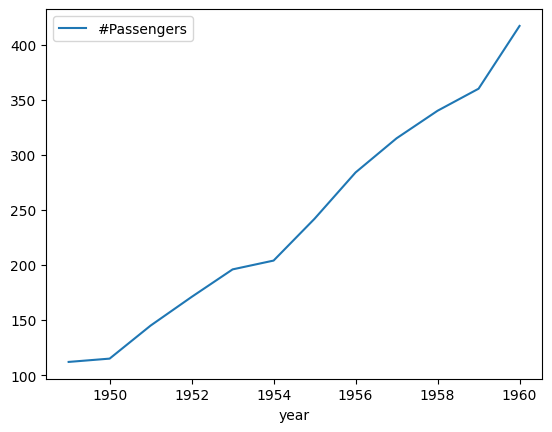

In [78]:
df_january.plot(x = 'year',y = '#Passengers')

Видим, что в январе с каждым годом количество пассажиров систематически повышается примерно на 40-50 человек

<AxesSubplot: xlabel='year'>

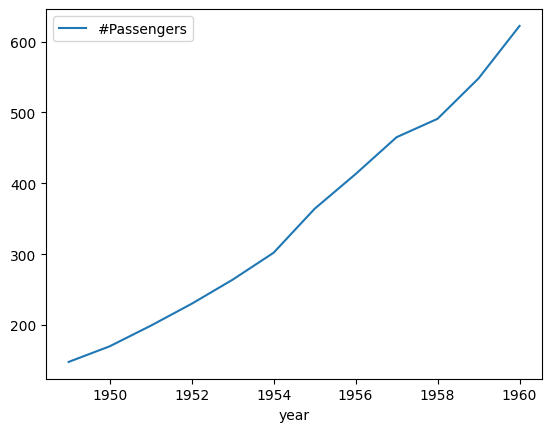

In [80]:
df_jule.plot(x = 'year',y = '#Passengers')

Видим, что по сравнению с январём в июле более быстрый рост, показывая, что в июле люди летают больше.

# 3. Среднее и дисперсия каждого года

In [88]:
df_mean = df.groupby(['year']).agg({'#Passengers':['mean']}) # среднее значение
df_mean

,#Passengers
,mean
year,
1949,126.666667
1950,139.666667
1951,170.166667
1952,197.000000
1953,225.000000
1954,238.916667
1955,284.000000
1956,328.250000


In [89]:
df_var = df.groupby(['year']).agg({'#Passengers': ['var']}) # дисперсия
df_var


,#Passengers
,var
year,
1949,188.242424
1950,363.696970
1951,339.969697
1952,527.454545
1953,810.363636
1954,1219.719697
1955,1775.818182
1956,2290.750000


# 4.a)Абсолютные разности

In [206]:
df_df = pd.read_csv('passengers.csv')
df_df1 = df_df.copy()
df_df2 = df_df.copy()


In [207]:
df_df['passengers_diff'] = df_df['#Passengers'].diff()
df_df

,Month,#Passengers,passengers_diff
0,1949-01,112,NaN
1,1949-02,118,6.0
2,1949-03,132,14.0
3,1949-04,129,-3.0
4,1949-05,121,-8.0
...,...,...,...
139,1960-08,606,-16.0
140,1960-09,508,-98.0
141,1960-10,461,-47.0
142,1960-11,390,-71.0


<AxesSubplot: xlabel='Month'>

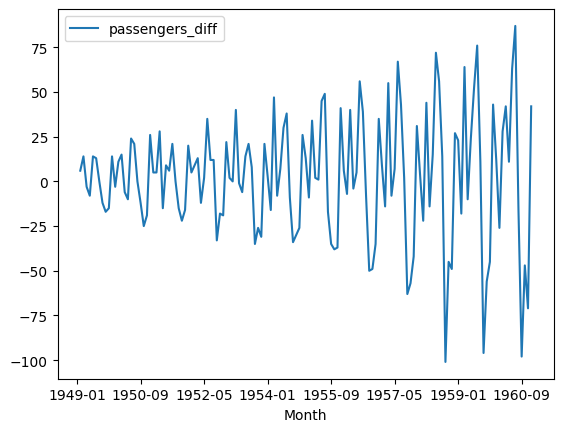

In [208]:
df_df.plot(x = 'Month',y = 'passengers_diff',kind='line')

По графику можем увидеть что в последние 3 года были месяца, когда люди не предпочитали никуда летать

# 4. б)Относительные разности

In [209]:
df_df['Passengers_change'] = df_df['#Passengers'].pct_change()
df_df

,Month,#Passengers,passengers_diff,Passengers_change
0,1949-01,112,NaN,NaN
1,1949-02,118,6.0,0.053571
2,1949-03,132,14.0,0.118644
3,1949-04,129,-3.0,-0.022727
4,1949-05,121,-8.0,-0.062016
...,...,...,...,...
139,1960-08,606,-16.0,-0.025723
140,1960-09,508,-98.0,-0.161716
141,1960-10,461,-47.0,-0.092520
142,1960-11,390,-71.0,-0.154013


<AxesSubplot: xlabel='Month'>

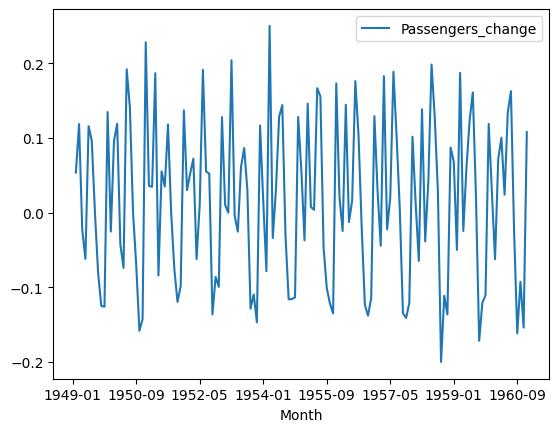

In [210]:
df_df.plot(x = 'Month', y = 'Passengers_change')

# 5.а)Понижение частоты дискретизации до года

In [192]:
df_df1['Month'] = pd.to_datetime(df_df1['Month'])
df_df1 = df_df1.set_index('Month')
df_df1


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [193]:
print(df_df1.resample('AS').sum()) # понизили частоту до года и просуммировали пассажиров за каждый месяц в год и получили сколько было пассажиров в каждом году


            #Passengers
Month                  
1949-01-01         1520
1950-01-01         1676
1951-01-01         2042
1952-01-01         2364
1953-01-01         2700
1954-01-01         2867
1955-01-01         3408
1956-01-01         3939
1957-01-01         4421
1958-01-01         4572
1959-01-01         5140
1960-01-01         5714


# 5. б) Повышение частоты до дня

In [195]:
print(df_df1.resample('D').mean()) # Повысили частоту до дня и в дальнейшем с помощью fillna можем заполнить поля средними значениями месяца


            #Passengers
Month                  
1949-01-01        112.0
1949-01-02          NaN
1949-01-03          NaN
1949-01-04          NaN
1949-01-05          NaN
...                 ...
1960-11-27          NaN
1960-11-28          NaN
1960-11-29          NaN
1960-11-30          NaN
1960-12-01        432.0

[4353 rows x 1 columns]
